In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.constants import N_A

In [2]:
# Neutron absorption cross section for 59Co, cm2.
sigma0 = 20 * 1.e-24
# Neutron absorption cross section for 60Co.
sigma1 = 0

# Half-life (days) and decay constant for 60Co, s-1.
thalf1 = 1925.4
lam1 = np.log(2) / (thalf1 * 24 * 60 * 60)

In [3]:
# Neutron flux, cm2.s-1.
Phi = 1.e14
# Mass of 59Co sample, g.
m59Co = 100
# Atomic mass of 59Co, Da.
M59Co = 58.9
# Number of 59Co atoms
N00 = m59Co / M59Co * N_A

In [4]:
def N0(t):
    """Amount of 59Co as a function of time."""
    return N00 * np.exp(-sigma0 * Phi * t)

def N1(t):
    """Amount of 60Co as a function of time."""
    d = Phi * (sigma1 - sigma0) + lam1
    return sigma0 * Phi * N00 / d * (np.exp(-sigma0*Phi*t) - np.exp(-(sigma1*Phi + lam1)*t))

def N2(t):
    """Amount of 60Ni as a function of time."""
    return N00 - N0(t) - N1(t)

def dN1dt(t):
    """Rate of change of 60Co as a function of time."""
    return sigma0 * Phi * N0(t) - N1(t) * (sigma1 * Phi + lam1)

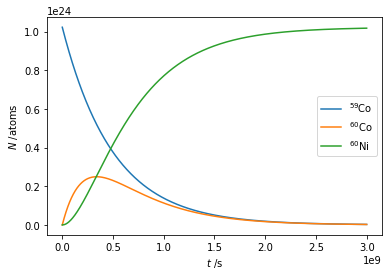

In [5]:
# Plot the isotope amounts up to tmax seconds.
tmax = 3.e9
t = np.linspace(0, tmax, 1000)
plt.plot(t, N0(t), label='$\mathrm{^{59}Co}$')
plt.plot(t, N1(t), label='$\mathrm{^{60}Co}$')
plt.plot(t, N2(t), label='$\mathrm{^{60}Ni}$')
plt.xlabel('$t$ /s')
plt.ylabel('$N$ /atoms')
plt.legend()

[The problem set associated with the course](https://ocw.mit.edu/courses/nuclear-engineering/22-01-introduction-to-nuclear-engineering-and-ionizing-radiation-fall-2016/assignments/MIT22_01F16_ProblemSet4.pdf) also suggests finding the optimum amount of time to irradiate the $\mathrm{^{59}Co}$ to maximise the profit from the $\mathrm{^{60}Co}$ generated, assuming a reactor time cost of USD 1000 per day and a $\mathrm{^{60}Co}$ price of USD 100 per $\mathrm{\mu Ci}$.

In [6]:
# Cost of reactor, USD.s-1.
CR = 1.e3 / 24 / 60 / 60
# Price of 60Co, Bq-1.
CI = 100 * 1.e6 / 3.7e10

In [7]:
def I(t):
    """The predicted net income from the 60Co after time t in the reactor (USD)."""
    # Calculate the activity of 60Co as A1 = lam1.N1.
    return -CR * t + CI * lam1 * N1(t)

def dIdt(t):
    """dI/dt in USD/sec."""
    return -CR + CI * lam1 * dN1dt(t)

Text(0, 0.5, 'USD profit')

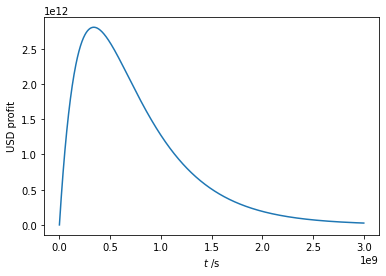

In [8]:
plt.plot(t, I(t))
plt.xlabel('$t$ /s')
plt.ylabel('USD profit')

The maximum profit can be found as the minimum of $-I$.

In [9]:
from scipy.optimize import minimize
minimize(lambda t: -I(t), 0.5e9, jac = lambda t:-dIdt(t))

      fun: -2806888567702.389
 hess_inv: array([[42765.86838808]])
      jac: array([-7.46765967e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 21
   status: 0
  success: True
        x: array([3.38753637e+08])

This turns out to be the same time as would produce the maximum amount of $\mathrm{^{60}Co}$ possible, presumably because USD 1000 per day is an unrealistically cheap cost for the reactor time during production and omits other considerations (such as isotopic separation and opportunity costs).

In [10]:
topt = 3.388e8 / 60 / 60 / 24 / 365
print(f'{topt:.1f} yrs')

10.7 yrs
